Problem 1: Linear Regression
You are a part of an investment firm and your work is to do research about these 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company in investing consciously. Also, provide them with 5 attributes that are most important.

Questions for Problem 1:

1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. (8 marks)
1.2) Impute null values if present? Do you think scaling is necessary in this case? (8 marks)
1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE. (8 marks)
1.4) Inference: Based on these predictions, what are the business insights and recommendations. (6 marks)


Data Dictionary for Firm_level_data:

1. sales: Sales (in millions of dollars).
2. capital: Net stock of property, plant, and equipment.
3. patents: Granted patents.
4. randd: R&D stock (in millions of dollars).
5. employment: Employment (in 1000s).
6. sp500: Membership of firms in the S&P 500 index. S&P is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States
7. tobinq: Tobin's q (also known as q ratio and Kaldor's v) is the ratio between a physical asset's market value and its replacement value.
8. value: Stock market value.
9. institutions: Proportion of stock owned by institutions.

Dataset for Problem 1: Firm_level_data.csvView in a new window



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Firm_level_data (1).csv')
df.head(5)

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [3]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [5]:
df.shape

(759, 9)

In [6]:
df.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,738.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.139309,2054.160386,60.510000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [9]:
df.dtypes

sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [10]:
df['patents'] = pd.to_numeric(df['patents'], downcast='float')
df['sp500']=df['sp500'].astype(bool)

In [11]:
df.dtypes

sales           float64
capital         float64
patents         float32
randd           float64
employment      float64
sp500              bool
tobinq          float64
value           float64
institutions    float64
dtype: object

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

In [14]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

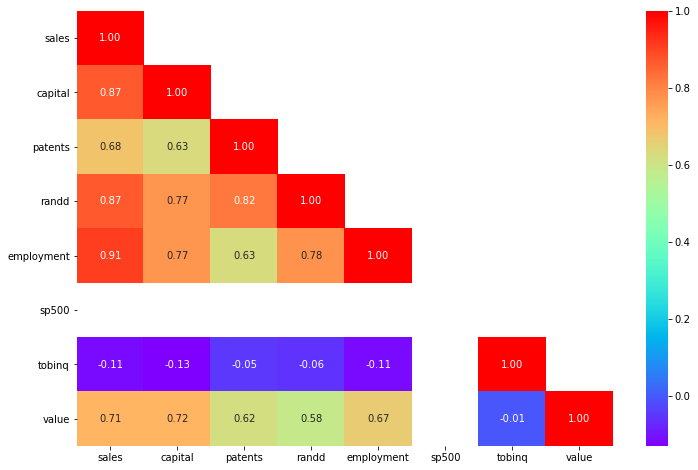

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,0:8].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:8].corr(),+1))
plt.show()

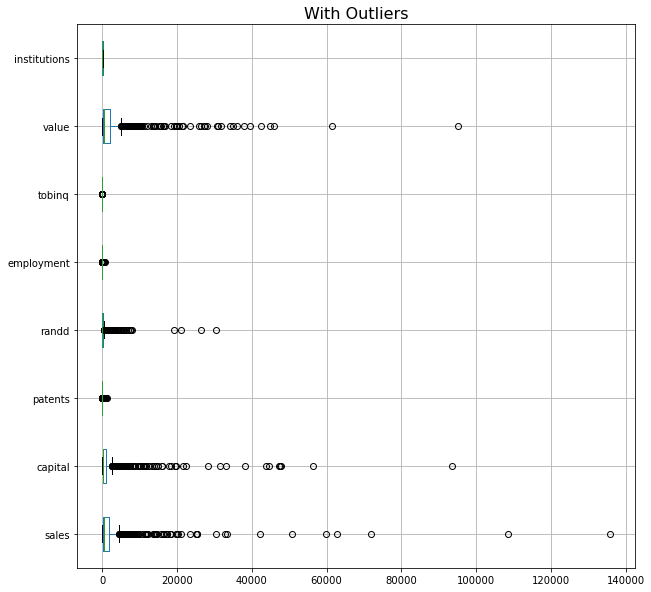

In [16]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool') & (df.dtypes!='object')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

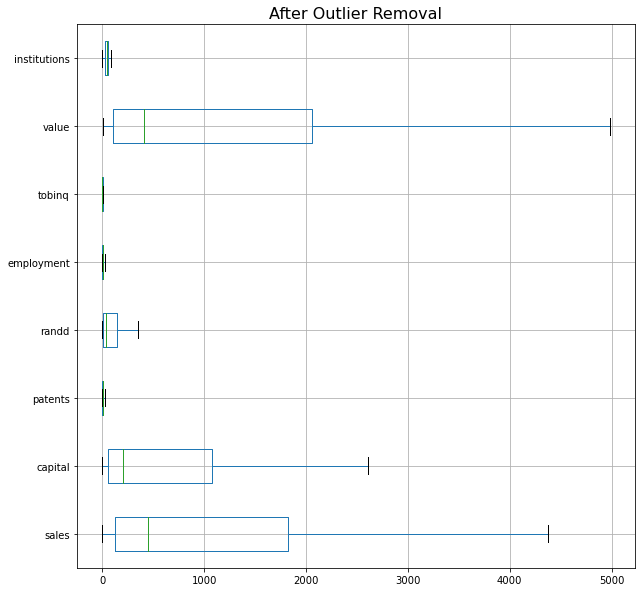

In [19]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

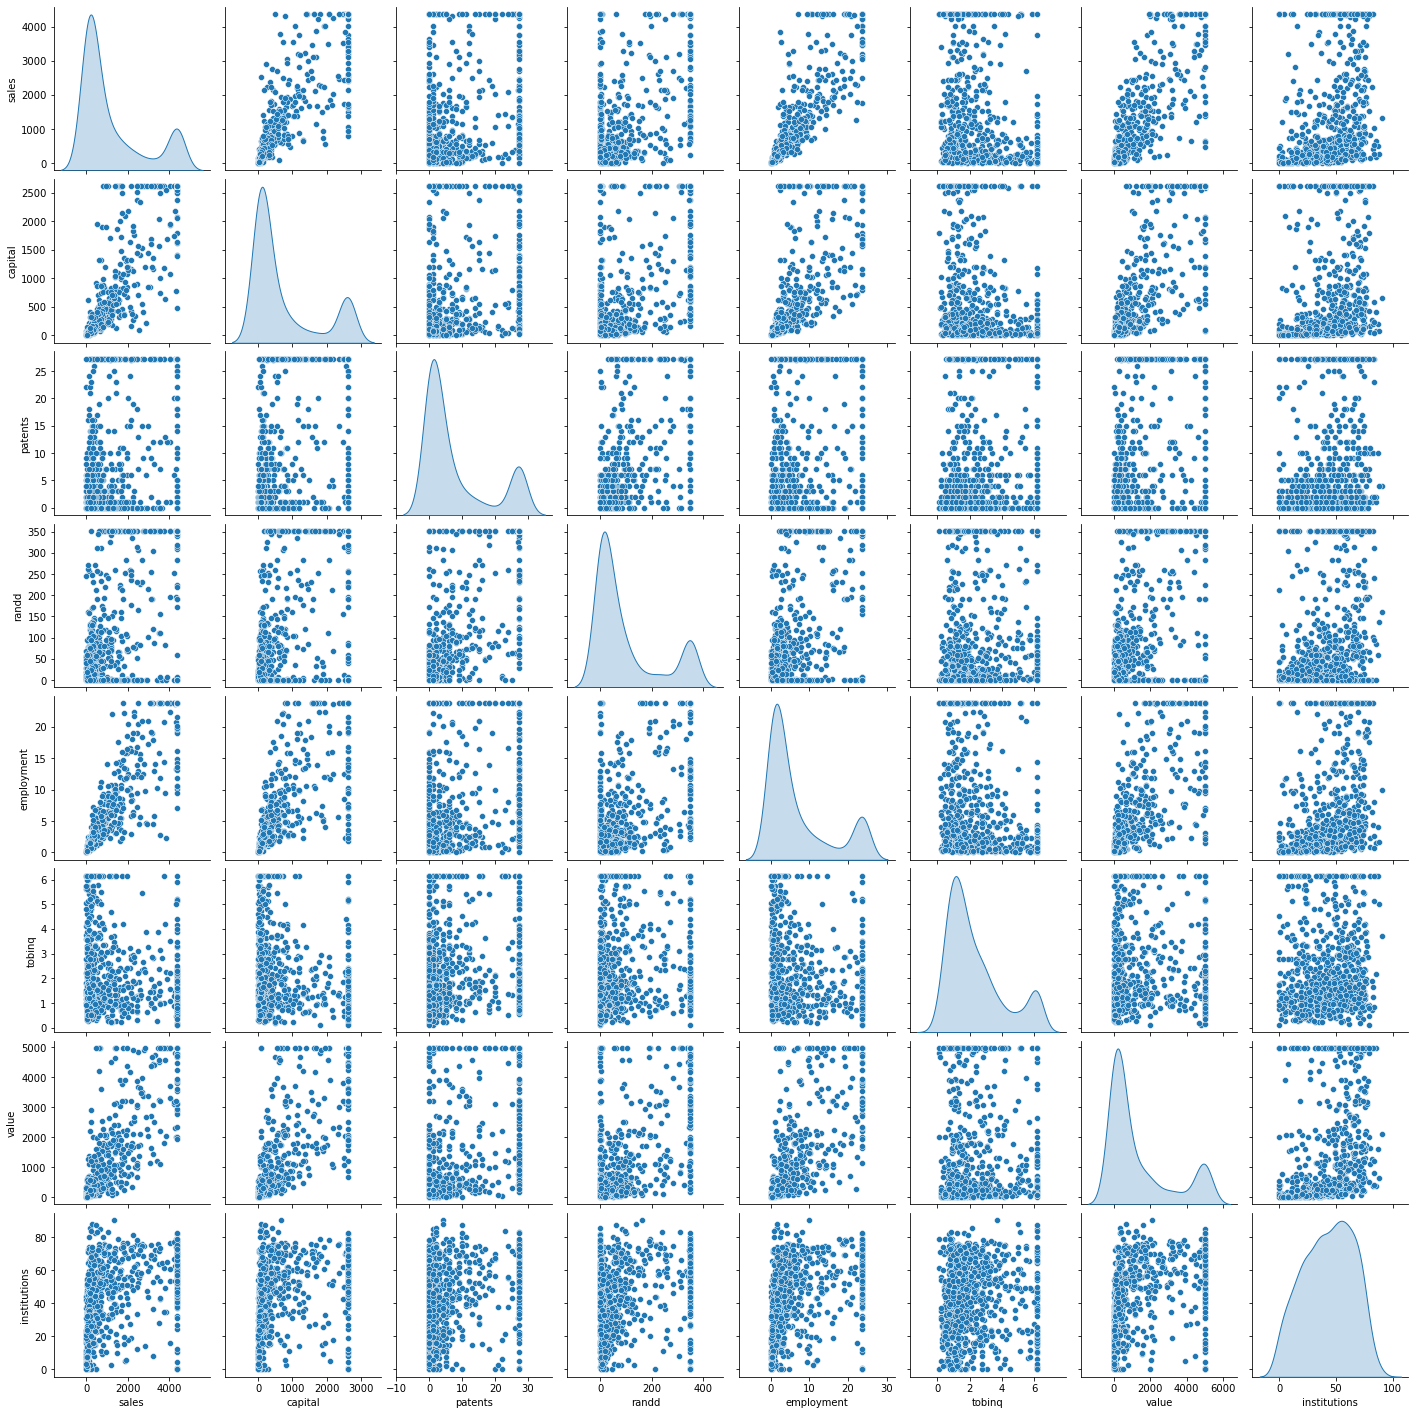

In [20]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

In [21]:
from sklearn import preprocessing,metrics

In [22]:
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = df.columns.values
df = pd.DataFrame(scl.fit_transform(df[fields]), columns = fields)

In [23]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,0.0,2.221566,0.142598,1.718839
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,0.0,-0.864319,-0.645807,0.738279
2,2.052715,1.962722,1.955496,1.979986,2.055116,0.0,1.670452,2.055843,0.215929
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,0.0,-1.177581,-0.748521,-0.744789
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,0.0,-0.736965,-0.746022,0.297142


In [24]:
# Copy all the predictor variables into X dataframe
X = df.drop('sales', axis=1)

# Copy target into the y dataframe. 
y = df[['sales']]

In [25]:
X.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,-0.591504,0.221152,1.979986,-0.564800,0.0,2.221566,0.142598,1.718839
1,-0.632706,-0.583181,-0.782879,-0.619331,0.0,-0.864319,-0.645807,0.738279
2,1.962722,1.955496,1.979986,2.055116,0.0,1.670452,2.055843,0.215929
3,-0.481679,-0.683723,-0.125658,-0.471265,0.0,-1.177581,-0.748521,-0.744789
4,-0.613908,-0.583181,-0.670901,-0.608694,0.0,-0.736965,-0.746022,0.297142


In [26]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [62]:
X_train.shape

(531, 8)

In [61]:

X_test.shape

(228, 8)

In [27]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.25576034883310883
The coefficient for patents is -0.026926315747962438
The coefficient for randd is 0.05461444078978246
The coefficient for employment is 0.4353702688036774
The coefficient for sp500 is -2.7755575615628914e-17
The coefficient for tobinq is -0.045902007100181684
The coefficient for value is 0.3011628173920244
The coefficient for institutions is 0.008851704532136753


In [29]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0028865681425918575


In [30]:
# R square on training data
regression_model.score(X_train, y_train)

0.9351141374453029

In [31]:
# R square on testing data
regression_model.score(X_test, y_test)

0.92745831905156

In [32]:
from sklearn import metrics
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.25984751382273696

In [33]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.25586151293440673

In [34]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions,sales
626,0.612227,0.723860,-0.206409,1.167240,0.0,-0.391592,0.488463,-0.532988,0.465498
333,-0.744145,-0.583181,-0.710087,-0.777545,0.0,-1.133098,-0.778833,-0.984276,-0.769637
257,-0.198723,1.226569,-0.095381,-0.036482,0.0,-0.118866,-0.203035,1.228328,-0.111504
173,0.081876,-0.784265,-0.240832,0.083340,0.0,0.476735,0.482702,1.230635,-0.027782
242,-0.340238,-0.583181,-0.782879,-0.657234,0.0,-0.102795,-0.580261,1.956480,-0.701687


In [35]:
data_train.columns

Index(['capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq', 'value',
       'institutions', 'sales'],
      dtype='object')

In [36]:
expr= 'sales ~ capital+patents+randd+employment+sp500+tobinq+value+institutions'

In [37]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       2.886568e-03
capital         2.557603e-01
patents        -2.692632e-02
randd           5.461444e-02
employment      4.353703e-01
sp500           4.554616e-16
tobinq         -4.590201e-02
value           3.011628e-01
institutions    8.851705e-03
dtype: float64

In [38]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1077.
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          6.82e-306
Time:                        15:08:54   Log-Likelihood:                -37.849
No. Observations:                 531   AIC:                             91.70
Df Residuals:                     523   BIC:                             125.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0029      0.011      0.254   

In [39]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('sales',axis=1))-data_train['sales'])**2)

In [40]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2598475138227369

In [41]:
np.sqrt(lm1.mse_resid) #another way

0.2618273330276858

In [42]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

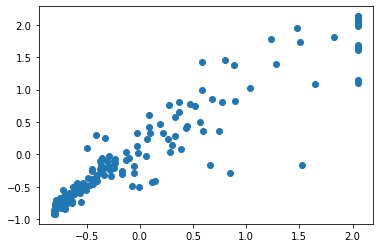

In [43]:
plt.scatter(y_test['sales'], y_pred)
plt.show()

In [44]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (0.26) * capital + (-0.03) * patents + (0.05) * randd + (0.44) * employment + (0.0) * sp500 + (-0.05) * tobinq + (0.3) * value + (0.01) * institutions + 

## Problem 2: Logistic Regression and Linear Discriminant Analysis

You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

Questions for Problem 2:

2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. (8 marks)
2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis). (8 marks)
2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized. (8 marks)
2.4) Inference: Based on these predictions, what are the insights and recommendations. (6 marks)

Data Dictionary for Car_Crash


1. dvcat: factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+
2. weight: Observation weights, albeit of uncertain accuracy, designed to account for varying sampling probabilities. (The inverse probability weighting estimator can be used to demonstrate causality when the researcher cannot conduct a controlled experiment but has observed data to model)
3. Survived: factor with levels Survived or not_survived
4. airbag: a factor with levels none or airbag
5. seatbelt: a factor with levels none or belted
6. frontal: a numeric vector; 0 = non-frontal, 1=frontal impact
7. sex: a factor with levels f: Female or m: Male
8. ageOFocc: age of occupant in years
9. yearacc: year of accident
10. yearVeh: Year of model of vehicle; a numeric vector
11. abcat: Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy, nodeploy and unavail
12. occRole: a factor with levels driver or pass: passenger
13. deploy: a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed.
14. injSeverity: a numeric vector; 0: none, 1: possible injury, 2: no incapacity, 3: incapacity, 4: killed; 5: unknown, 6: prior death
15. caseid: character, created by pasting together the populations sampling unit, the case number, and the vehicle number. Within each year, use this to uniquely identify the vehicle.


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [46]:
df1=pd.read_csv('Car_Crash (1).csv')

In [47]:
df1

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [49]:
df1.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [51]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df1.shape)

Number of duplicate rows = 0
(11217, 15)


In [52]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

dvcat
10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64


Survived
survived        10037
Not_Survived     1180
Name: Survived, dtype: int64


airbag
airbag    7064
none      4153
Name: airbag, dtype: int64


seatbelt
belted    7849
none      3368
Name: seatbelt, dtype: int64


sex
m    6048
f    5169
Name: sex, dtype: int64


abcat
deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64


occRole
driver    8786
pass      2431
Name: occRole, dtype: int64


caseid
73:100:2    7
78:2:1      6
49:106:1    6
73:110:1    6
74:74:2     6
           ..
5:33:1      1
9:77:1      1
4:59:2      1
79:67:1     1
74:119:1    1
Name: caseid, Length: 6488, dtype: int64




In [63]:
df1.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000
mean,431.071396,0.643806,37.436984,2001.101167,1994.172531,0.389677,1.825583
std,1410.173474,0.478895,18.170396,1.058695,5.658508,0.487699,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.120000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.042000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,322.273000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [54]:
df1.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [55]:
df1.dropna(inplace=True)

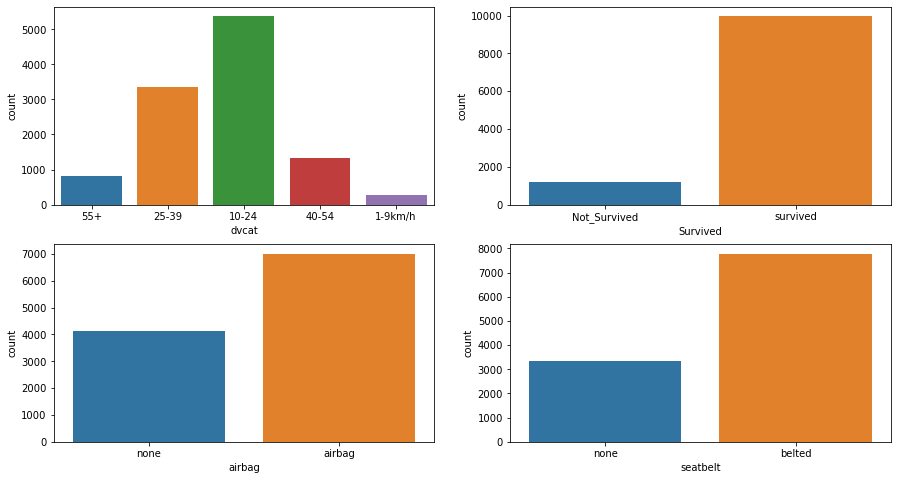

In [56]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,8)
a = sns.countplot(df1['dvcat'] , ax=axes[0][0])


a = sns.countplot(df1['Survived'] , orient = "v" , ax=axes[0][1])


a = sns.countplot(df1['airbag']  , ax=axes[1][0])


a = sns.countplot(df1['seatbelt'] , orient = "v" , ax=axes[1][1])


plt.show()

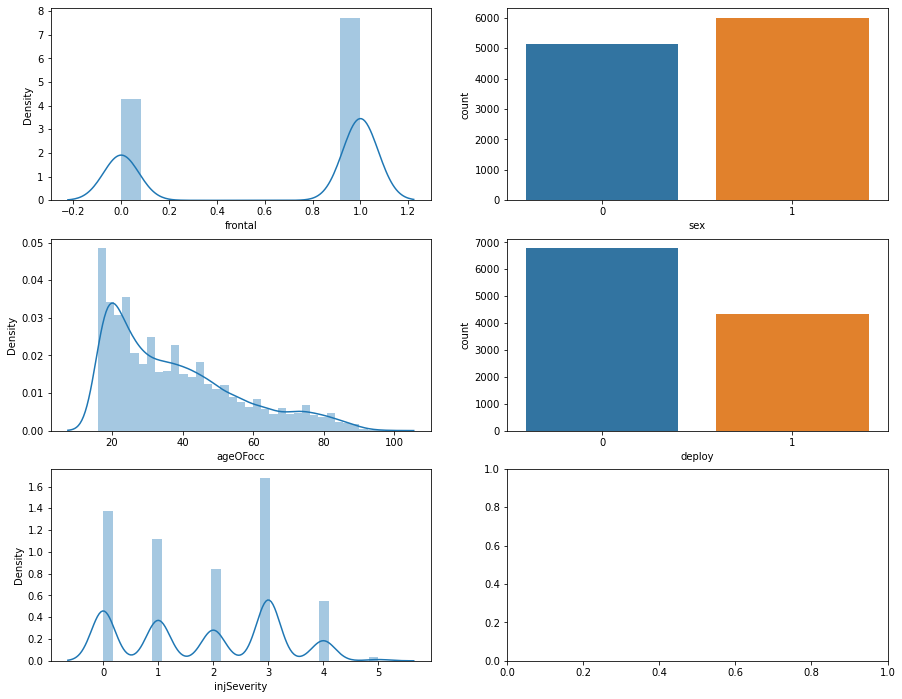

In [126]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,12)
a = sns.distplot(df1['frontal'] , ax=axes[0][0])


a = sns.countplot(df1['sex']  , orient = "v" , ax=axes[0][1])


a = sns.distplot(df1['ageOFocc'] , ax=axes[1][0])


a = sns.countplot(df1['deploy']  , orient = "v" , ax=axes[1][1])



a = sns.distplot(df1['injSeverity'] , ax=axes[2][0])



plt.show()

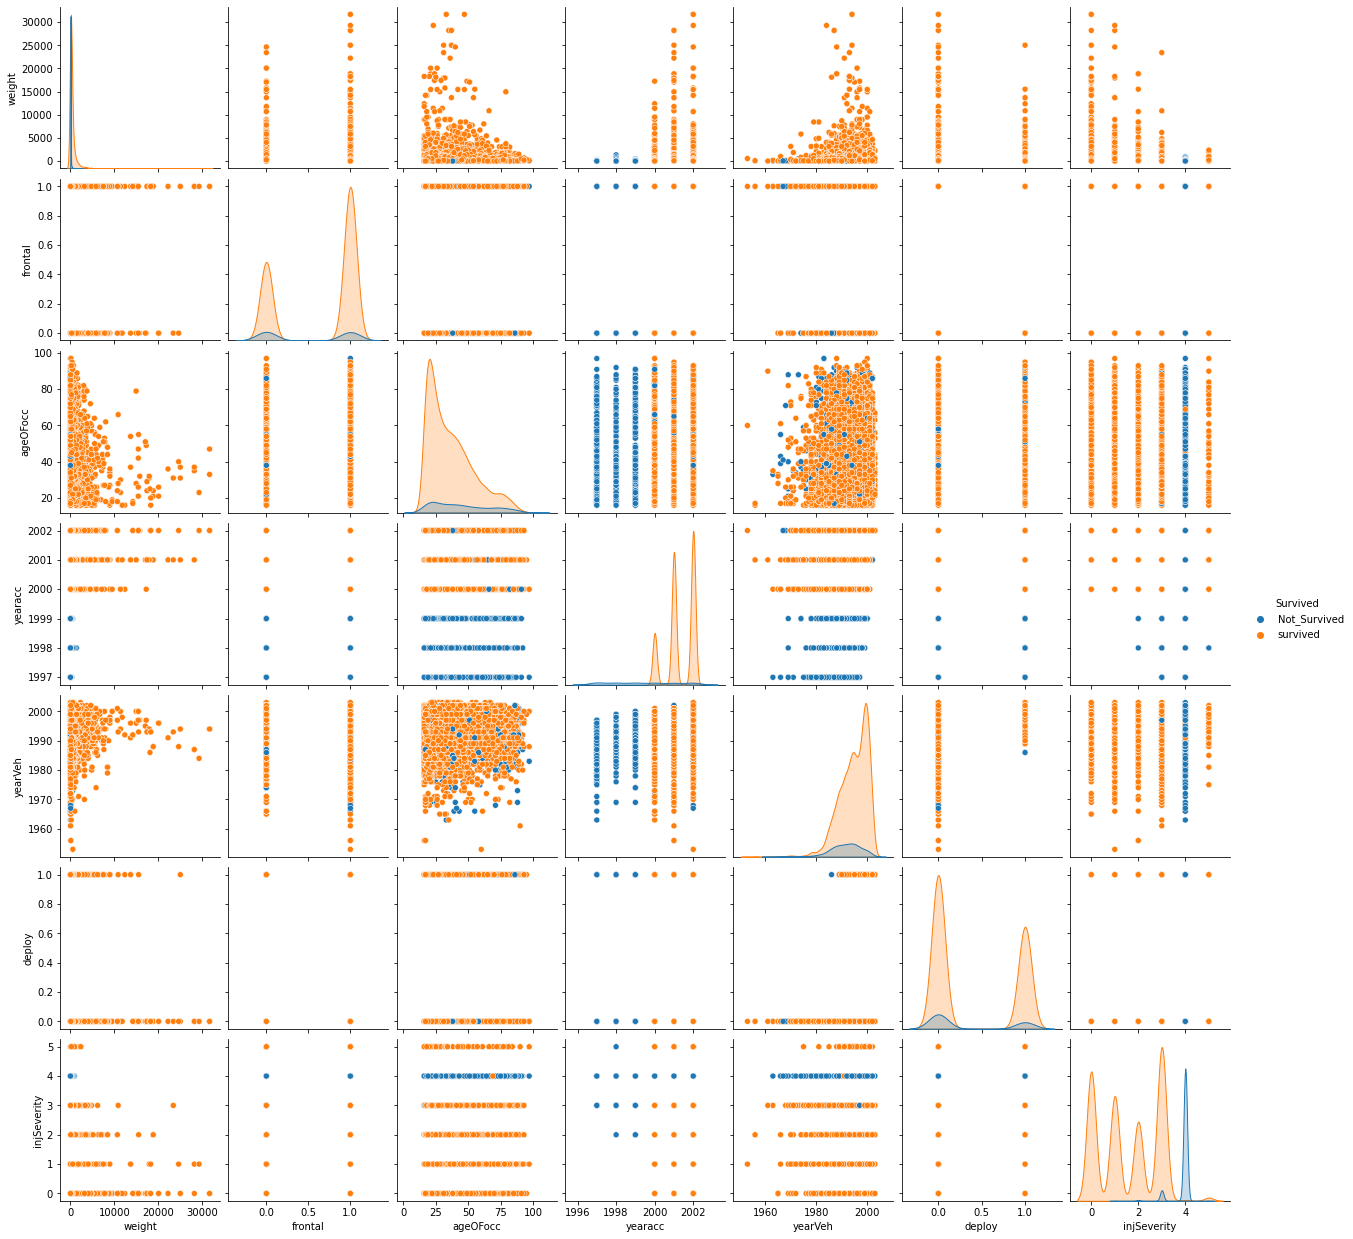

In [64]:
sns.pairplot(df1,hue='Survived',diag_kind='kde' )

In [65]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: dvcat
['55+', '25-39', '10-24', '40-54', '1-9km/h']
Categories (5, object): ['1-9km/h', '10-24', '25-39', '40-54', '55+']
[4 2 1 3 0]


feature: Survived
['Not_Survived', 'survived']
Categories (2, object): ['Not_Survived', 'survived']
[0 1]


feature: airbag
['none', 'airbag']
Categories (2, object): ['airbag', 'none']
[1 0]


feature: seatbelt
['none', 'belted']
Categories (2, object): ['belted', 'none']
[1 0]


feature: sex
['m', 'f']
Categories (2, object): ['f', 'm']
[1 0]


feature: abcat
['unavail', 'nodeploy', 'deploy']
Categories (3, object): ['deploy', 'nodeploy', 'unavail']
[2 1 0]


feature: occRole
['driver', 'pass']
Categories (2, object): ['driver', 'pass']
[0 1]


feature: caseid
['2:13:2', '2:17:1', '2:79:1', '4:58:1', '4:96:2', ..., '82:93:1', '82:100:1', '82:101:2', '82:107:1', '82:110:2']
Length: 6482
Categories (6482, object): ['11:100:2', '11:101:1', '11:102:1', '11:103:1', ..., '9:98:3', '9:99:1', '9:99:2', '9:9:1']
[1000 1010 1099 ... 5665 5673 5681]


In [66]:
# Copy all the predictor variables into X dataframe
X = df1.drop(['Survived','caseid'], axis=1)

# Copy target into the y dataframe. 
y = df1[['Survived']]

In [67]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
X_train_LDA = X_train.copy()
X_test_LDA = X_test.copy()
y_train_LDA = y_train.copy()
y_test_LDA = y_test.copy()

In [123]:
X_train.shape

(7798, 13)

In [124]:
X_test.shape

(3342, 13)

In [68]:
# Fit the Logistic Regression model
model1 = LogisticRegression(random_state=1,solver="liblinear")
model1.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [69]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model1.coef_[0][idx]))

The coefficient for dvcat is -0.8090498983838582
The coefficient for weight is 0.005891933632860014
The coefficient for airbag is -0.3356906473405928
The coefficient for seatbelt is -0.679688161181257
The coefficient for frontal is 0.9223448939652169
The coefficient for sex is -0.34413254249319275
The coefficient for ageOFocc is -0.03294022316775236
The coefficient for yearacc is 0.06036452381084595
The coefficient for yearVeh is -0.05130120765559445
The coefficient for abcat is -0.29447299901387647
The coefficient for occRole is -0.1407307747405275
The coefficient for deploy is -0.04706232343353446
The coefficient for injSeverity is -4.091220719467245


In [70]:
intercept = model1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.005844675106812815


In [71]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

In [72]:
ytest_predict_prob=model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.950968e-01,0.804903
1,1.152930e-01,0.884707
2,1.084213e-06,0.999999
3,5.733174e-04,0.999427
4,1.105813e-09,1.000000


Feature: 0, Score: -0.80905
Feature: 1, Score: 0.00589
Feature: 2, Score: -0.33569
Feature: 3, Score: -0.67969
Feature: 4, Score: 0.92234
Feature: 5, Score: -0.34413
Feature: 6, Score: -0.03294
Feature: 7, Score: 0.06036
Feature: 8, Score: -0.05130
Feature: 9, Score: -0.29447
Feature: 10, Score: -0.14073
Feature: 11, Score: -0.04706
Feature: 12, Score: -4.09122


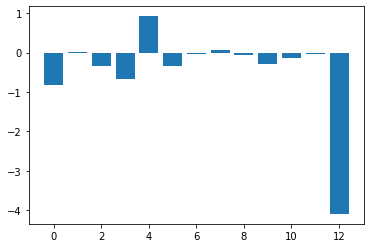

In [73]:
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [74]:
# Accuracy - Training Data
model1.score(X_train, y_train)

0.981277250577071

AUC: 0.988


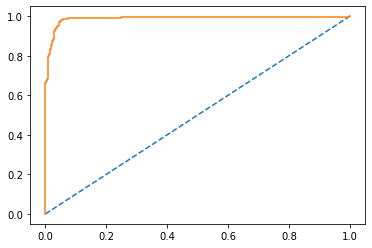

In [75]:
# predict probabilities
probs = model1.predict_proba(X_train)
prob1 = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [76]:
# Accuracy - Test Data
model1.score(X_test, y_test)

0.9793536804308797

AUC: 0.988


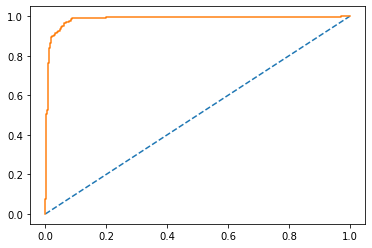

In [77]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [78]:
confusion_matrix(y_train, ytrain_predict)

array([[ 727,   90],
       [  56, 6925]], dtype=int64)

In [79]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       817
           1       0.99      0.99      0.99      6981

    accuracy                           0.98      7798
   macro avg       0.96      0.94      0.95      7798
weighted avg       0.98      0.98      0.98      7798



In [80]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 318,   45],
       [  24, 2955]], dtype=int64)

In [81]:
#Test Data Accuracy
test_acc=model1.score(X_test,y_test)
test_acc

0.9793536804308797

In [82]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       363
           1       0.98      0.99      0.99      2979

    accuracy                           0.98      3342
   macro avg       0.96      0.93      0.95      3342
weighted avg       0.98      0.98      0.98      3342



In [83]:
lr=LogisticRegression(solver="liblinear")
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000,10000,10000]}
model_lr = GridSearchCV(lr, param_grid=grid_values)
model_lr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               10000],
                         'penalty': ['l1', 'l2']})

In [84]:
print('Best Penalty:', model_lr.best_estimator_.get_params()['penalty'])
print('Best C:', model_lr.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.1


In [85]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [86]:
prob3=model_lr.predict_proba(X_train)
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.692216e-01,0.830778
1,1.006251e-01,0.899375
2,6.011290e-07,0.999999
3,4.796004e-04,0.999520
4,8.078700e-10,1.000000


In [87]:
# Accuracy - Training Data
model_lr.score(X_train, y_train)

0.9821749166452937

AUC: 0.988


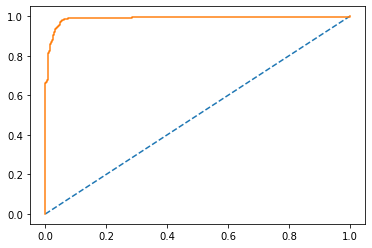

In [88]:
# predict probabilities
probs = model_lr.predict_proba(X_train)
prob4 = model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [89]:
# Accuracy - Test Data
model_lr.score(X_test, y_test)

0.9796529024536206

AUC: 0.988


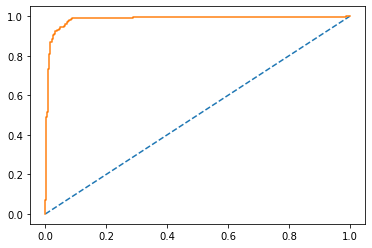

In [90]:
# predict probabilities
probs = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [91]:
confusion_matrix(y_train, ytrain_predict)

array([[ 732,   85],
       [  54, 6927]], dtype=int64)

In [92]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       817
           1       0.99      0.99      0.99      6981

    accuracy                           0.98      7798
   macro avg       0.96      0.94      0.95      7798
weighted avg       0.98      0.98      0.98      7798



In [93]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 319,   44],
       [  24, 2955]], dtype=int64)

In [94]:
#Test Data Accuracy
test_acc=model_lr.score(X_test,y_test)
test_acc

0.9796529024536206

In [95]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       363
           1       0.99      0.99      0.99      2979

    accuracy                           0.98      3342
   macro avg       0.96      0.94      0.95      3342
weighted avg       0.98      0.98      0.98      3342



In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [97]:
clf = LinearDiscriminantAnalysis()
model2=clf.fit(X_train_LDA,y_train_LDA)
model2

LinearDiscriminantAnalysis()

In [98]:
# Predict it
ytrain_predict = model2.predict(X_train_LDA)

In [99]:
confusion_matrix(y_train_LDA, ytrain_predict)

array([[ 573,  244],
       [  64, 6917]], dtype=int64)

In [100]:
print(classification_report(y_train_LDA, ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       817
           1       0.97      0.99      0.98      6981

    accuracy                           0.96      7798
   macro avg       0.93      0.85      0.88      7798
weighted avg       0.96      0.96      0.96      7798



In [101]:
# Accuracy - Training Data
model2.score(X_train_LDA, y_train_LDA)

0.9605026929982047

AUC: 0.969


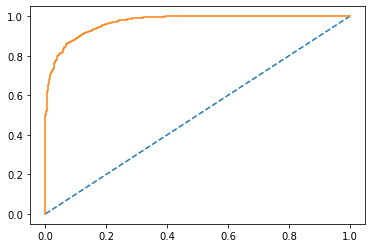

In [102]:
# predict probabilities
probs = model2.predict_proba(X_train_LDA)
prob2 = model2.predict_proba(X_train_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_LDA, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [103]:
ytest_predict = model2.predict(X_test_LDA)
cnf_matrix=confusion_matrix(y_test_LDA, ytest_predict)
cnf_matrix

array([[ 261,  102],
       [  34, 2945]], dtype=int64)

In [104]:
#Test Data Accuracy
test_acc=model2.score(X_test_LDA,y_test_LDA)
test_acc

0.9593058049072412

AUC: 0.969


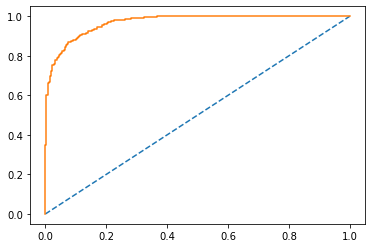

In [105]:
# predict probabilities
probs = model2.predict_proba(X_test_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test_LDA, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [106]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       363
           1       0.97      0.99      0.98      2979

    accuracy                           0.96      3342
   macro avg       0.93      0.85      0.89      3342
weighted avg       0.96      0.96      0.96      3342



In [107]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# Init the Model
lda = LinearDiscriminantAnalysis()

# Init Grid Search Class
model = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Do the Grid Search
model3=model.fit(X_train_LDA,y_train_LDA)
model3

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [108]:
# Predict it
ytrain_predict3 = model3.predict(X_train_LDA)

In [109]:
confusion_matrix(y_train_LDA, ytrain_predict3)
print(classification_report(y_train_LDA, ytrain_predict3))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       817
           1       0.97      0.99      0.98      6981

    accuracy                           0.96      7798
   macro avg       0.93      0.85      0.88      7798
weighted avg       0.96      0.96      0.96      7798



In [110]:
# Accuracy - Training Data
model3.score(X_train_LDA, y_train_LDA)

0.9605026929982047

AUC: 0.969


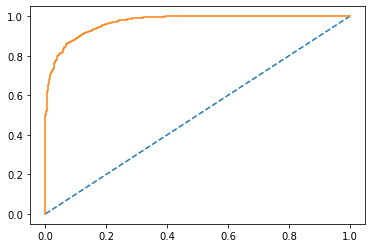

In [111]:
# predict probabilities
probs = model3.predict_proba(X_train_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_LDA, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [112]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       363
           1       0.97      0.99      0.98      2979

    accuracy                           0.96      3342
   macro avg       0.93      0.85      0.89      3342
weighted avg       0.96      0.96      0.96      3342



In [113]:
ytest_predict = model3.predict(X_test_LDA)

In [114]:
cnf_matrix=confusion_matrix(y_test_LDA, ytest_predict)
cnf_matrix

array([[ 261,  102],
       [  34, 2945]], dtype=int64)

In [115]:
test_acc=model3.score(X_test_LDA,y_test_LDA)
test_acc

0.9593058049072412

AUC: 0.969


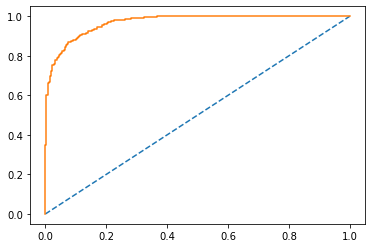

In [116]:
# predict probabilities
probs = model3.predict_proba(X_test_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test_LDA, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [117]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       363
           1       0.97      0.99      0.98      2979

    accuracy                           0.96      3342
   macro avg       0.93      0.85      0.89      3342
weighted avg       0.96      0.96      0.96      3342



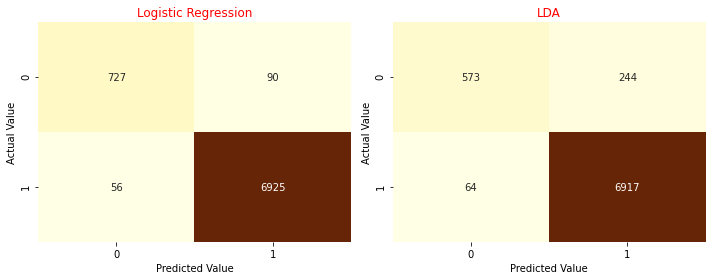

In [118]:
models=[model1,model2]
models_names={model1:'Logistic Regression',model2:'LDA'}
fig=plt.figure(figsize=(10,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,2,i+1)   
    sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')   
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

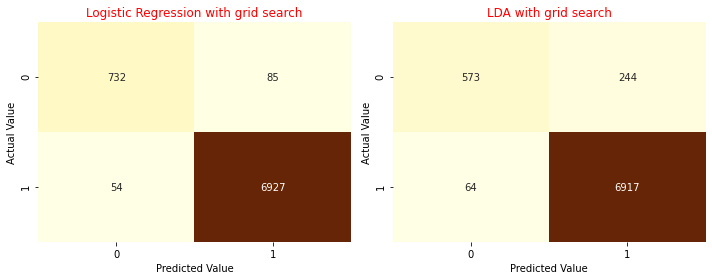

In [119]:
models=[model_lr,model3]
models_names={model_lr:'Logistic Regression with grid search',model3:'LDA with grid search'}
fig=plt.figure(figsize=(10,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,2,i+1)   
    sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')   
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

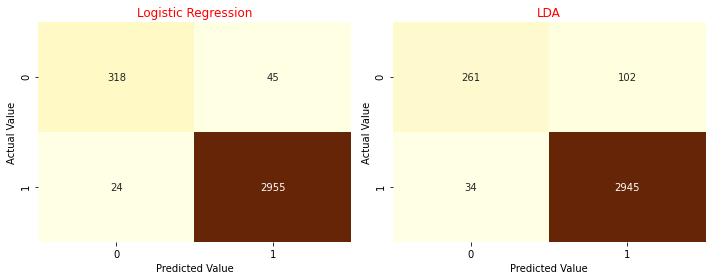

In [120]:
models=[model1,model2]
models_names={model1:'Logistic Regression',model2:'LDA'}
fig=plt.figure(figsize=(10,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,2,i+1)   
    sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Test set')
plt.tight_layout()

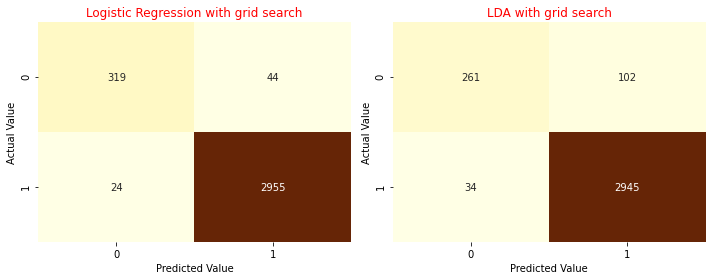

In [121]:
models=[model_lr,model3]
models_names={model_lr:'Logistic Regression with grid search',model3:'LDA with grid search'}
fig=plt.figure(figsize=(10,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,2,i+1)   
    sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Test set')
plt.tight_layout()

0.1 

Accuracy Score 0.937
F1 Score 0.9658 

Confusion Matrix


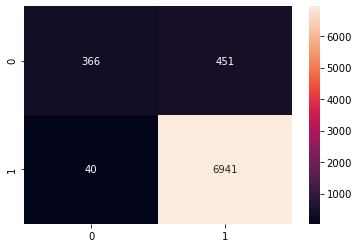

0.2 

Accuracy Score 0.9649
F1 Score 0.9806 

Confusion Matrix


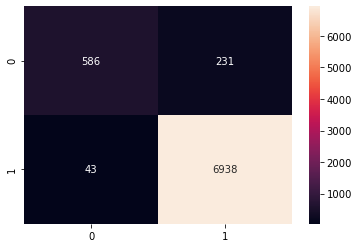

0.3 

Accuracy Score 0.9742
F1 Score 0.9857 

Confusion Matrix


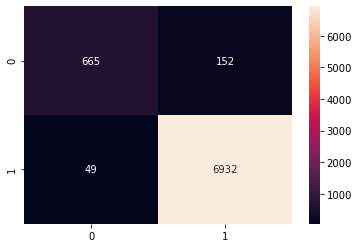

0.4 

Accuracy Score 0.9791
F1 Score 0.9884 

Confusion Matrix


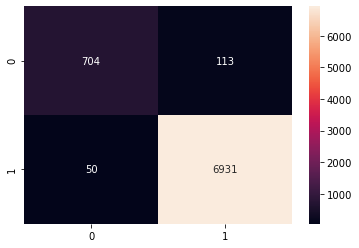

0.5 

Accuracy Score 0.9813
F1 Score 0.9896 

Confusion Matrix


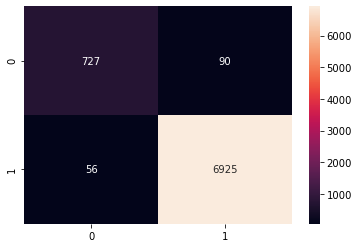

0.6 

Accuracy Score 0.9831
F1 Score 0.9905 

Confusion Matrix


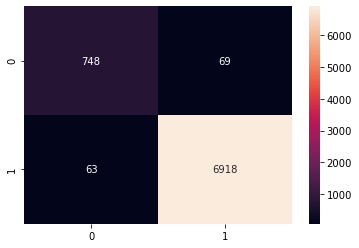

0.7 

Accuracy Score 0.9824
F1 Score 0.9902 

Confusion Matrix


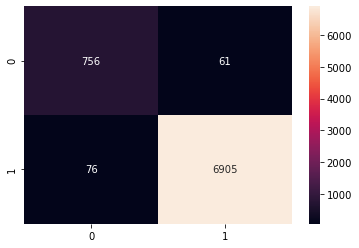

0.8 

Accuracy Score 0.9768
F1 Score 0.9869 

Confusion Matrix


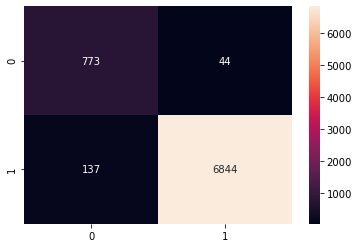

0.9 

Accuracy Score 0.9482
F1 Score 0.9703 

Confusion Matrix


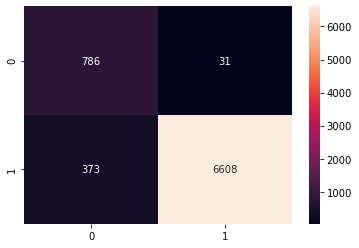

In [122]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(prob1[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();